In [2]:
import numpy as np
def make_mock(dat):
    """Simulates shape noise and measurement error using HSC year1 shape catalog
    Args:
        dat (ndarray):  input year-1 shape catalog
    Returns:
        dg1 (ndarray):  noise on shear (first component)
        dg2 (ndarray):  noise on shear (second component)
    """

    def RotCatalog(e1, e2):
        """Rotates galaxy ellipticity
        Args:
            e1 (ndarray):  input ellipticity (first component)
            e2 (ndarray):  input ellipticity (second component)
        Returns:
            e1_rot (ndarray):  rotated ellipticity (first component)
            e2_rot (ndarray):  rotated ellipticity (second component)
        """
        phi = 2.0 * np.pi * np.random.rand(len(e1))
        cs = np.cos(phi)
        ss = np.sin(phi)
        e1_rot = e1 * cs + e2 * ss
        e2_rot = (-1.0) * e1 * ss + e2 * cs
        return e1_rot, e2_rot

    e1_ini= dat['ishape_hsm_regauss_e1'] # shape
    e2_ini= dat['ishape_hsm_regauss_e2']
    erms =  dat['ishape_hsm_regauss_derived_rms_e'] # RMS of shape noise
    sigma_e2 = (s19A_table['ishape_hsm_regauss_derived_shape_weight'])**(-1) - erms**2
    esigma= np.sqrt(sigma_e2) * (2*np.random.randint(0,2,size=(sigma_e2.shape))-1) #my dataset does not have this dat['ishape_hsm_regauss_derived_sigma_e'] # 1 sigma of measurment error
    eres =   1.-np.average(erms**2.) # shear response (no shape weight)

    # rotate galaxy
    e1_rot, e2_rot = RotCatalog(e1_ini, e2_ini)

    # shape noise
    # equation (23) of https://arxiv.org/pdf/1901.09488.pdf
    f = np.sqrt( erms * erms / ( erms * erms + esigma * esigma ))
    e1_shape = e1_rot * f; e2_shape = e2_rot * f
    # measurment error
    e1_n = esigma * np.random.randn(len(e1_ini))
    e2_n = esigma * np.random.randn(len(e2_ini))

    dg1 = (e1_n+e1_shape)/2./eres
    dg2 = (e2_n+e2_shape)/2./eres
    return dg1,dg2

In [3]:
import astropy
from astropy.io import fits

In [4]:
s19A = fits.open('9347.fits')

In [5]:
s19A[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   97 / length of dimension 1                          
NAXIS2  =               171260 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   17 / number of table fields                         
TTYPE1  = 'ishape_hsm_regauss_e1'                                               
TFORM1  = 'E       '                                                            
TTYPE2  = 'ishape_hsm_regauss_e2'                                               
TFORM2  = 'E       '                                                            
TTYPE3  = 'ishape_hsm_regaus

In [6]:
data = s19A[1].data

In [7]:
from astropy.table import Table

In [8]:
s19A_table = Table(data)

In [10]:
s19A_table['mlz_photoz_best'].size

171260

In [130]:
dg1, dg2 = make_mock(s19A_table)

In [131]:
import matplotlib.pyplot as plt

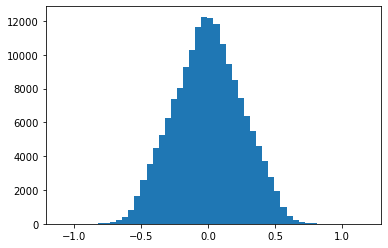

In [133]:
plt.hist(dg1,bins = 50)
plt.show()

In [96]:
import statistics

In [98]:
statistics.stdev(dg2)

0.25490816889615847

In [134]:
error_mock = 0.255*np.random.randn(171260)

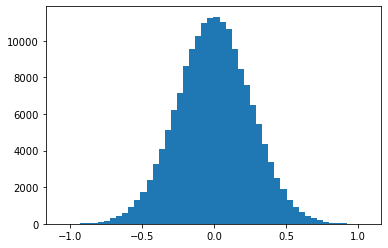

In [136]:
plt.hist(error_mock,bins = 50)
plt.show()

In [137]:
sigma_e2 = (s19A_table['ishape_hsm_regauss_derived_shape_weight'])**(-1) - s19A_table['ishape_hsm_regauss_derived_rms_e']**2

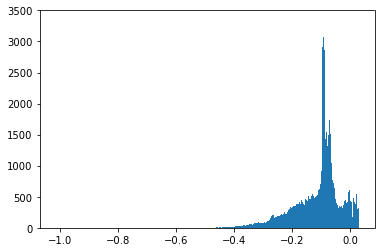

In [139]:
plt.hist(s19A_table['ishape_hsm_regauss_derived_shear_bias_m'],bins=1000)
## this looks like a chisqured sitribution
plt.show()

In [113]:
2*np.random.randint(0,2,size=(10))-1

array([-1,  1, -1, -1,  1, -1,  1,  1,  1,  1])

In [118]:
sigma_e = np.sqrt(sigma_e2) * (2*np.random.randint(0,2,size=(sigma_e2.shape))-1)

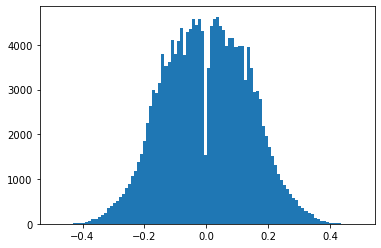

In [120]:
plt.hist(sigma_e,bins=100)
plt.show()

In [121]:
statistics.stdev(sigma_e)

0.13710548544898707

In [143]:
print(dg1.size)

171260


In [147]:
import random
print(random.randint(0, dg1.size-1))

111605


In [155]:
random.randint(0,10) + 30 +1j*15 + 1j* random.randint(0,10)

(32+25j)

In [156]:
dg1.reshape(2,85630)

-0.2215733556282535 .. 0.08740382821334632
-0.23603334967111084 .. 0.13729486451569817


In [159]:
np.ones((92160,)).reshape((10,96,96)).shape

(10, 96, 96)

In [160]:
print(len(np.ones((92160,)).reshape((10,96,96))))

10
